思序  
1. 資料預處理  
    1. 檢查資料有無缺失值 -> 填補缺失值
        1. 缺失值-數值 -> 填補中位數
        2. 缺失值-類別 -> 填補最常出現的資料
        3. 額外注意: 不要對測試資料填補中位數  
    2. 訓練資料中的類別資料 需轉換為 數字資料 One-Hot Encoding
    3. 特殊資料的處理 -> 擷取資料中的特定資訊 or 丟掉(謹慎考慮)
    4. 資料清理 -> 經one-hot encoding 後的欄位，可以丟棄<br>
<br>
2. 找出相關係數 <br>
<br>
3. Ensemble (組合)  
    1. 平行組合 -> 隨機森林 
        1. cross_val_score
        2. GridSearchCV
    2. 連續組合 <br>
<br>
4. 導入測試資料

In [2]:
import pandas as pd


traindf = pd.read_csv("Titanic_train.csv", encoding="utf-8")
testdf = pd.read_csv("Titanic_test.csv", encoding="utf-8")

In [3]:
# 缺失值

traindf.isna().sum()
# isnull 顯示有無缺失 / sum 整合顯示

med = traindf.median()
# 找出中位數

traindf = traindf.fillna(med)
# 空缺值 填上中位數
testdf = testdf.fillna(med)
# 空缺值 填上中位數

# traindf.isna().sum()

C:\Users\李重誼\AppData\Local\Temp\ipykernel_12760\1019606996.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = traindf.median()


In [4]:
# 缺失值
# 處理 Embarked

most = traindf["Embarked"].value_counts().idxmax()
# value_counts 計算欄位資料種類 / idxmax 找出最大值

traindf["Embarked"] = traindf["Embarked"].fillna(most)
# 缺失值 填入most
testdf["Embarked"] = testdf["Embarked"].fillna(most)

# traindf.isna().sum()

In [5]:
# One-Hot Encoding
# 需先考慮哪些類別資料需要轉換

dummy = pd.get_dummies(traindf["Embarked"])
# one hot encoding

traindf = pd.concat([traindf, dummy], axis=1)
# 水平合併兩個daraframe

dummy = pd.get_dummies(testdf["Embarked"])
testdf = pd.concat([testdf, dummy], axis=1)

In [6]:
# One-Hot Encoding
# 需先考慮哪些類別資料需要轉換

dummy = pd.get_dummies(traindf["Sex"])
traindf = pd.concat([traindf, dummy], axis=1)

dummy = pd.get_dummies(testdf["Sex"])
testdf = pd.concat([testdf, dummy], axis=1)

In [7]:
# 特殊資料的處理 (取稱謂)
middle_name = "Braund, Mr. Owen Harris".split(",")[-1].split(".")[0]
middle_name = middle_name.replace(" ", "")

In [8]:
# 特殊資料的處理 (取稱謂)

def nameflow(s):
    middle_name = s.split(",")[-1].split(".")[0]
    middle_name =  middle_name.replace(" ", "")
    return middle_name
# 定義流程

name = traindf["Name"].apply(nameflow)

In [9]:
# 轉換完，類別資料要one-hot encoding 但!! 不是每一種都有必要轉換
# 使用crosstab   檢視稱謂資料 與 生存率的關係   (太少 or 太沒必要的資料   可以捨去)

pd.crosstab(name, traindf["Survived"]).T
# crosstab 對兩個欄位pivottable / .T 翻轉

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [10]:
def nameflow(s):
    middle_name = s.split(",")[-1].split(".")[0]
    middle_name =  middle_name.replace(" ", "")
    if middle_name == "Miss":
        return "Miss"
    elif middle_name == "Mr":
        return "Mr"
    elif middle_name == "Mrs":
        return "Mrs"
    else:
        return "Throw"
name = traindf["Name"].apply(nameflow)
dummy = pd.get_dummies(name)
# 過濾資料 / one-hot encoding

traindf = pd.concat([traindf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,Throw
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,0,0,1,0,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,0,0,1,1,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,S,0,0,1,1,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,1,0,0,0,1,0,1,0,0


In [11]:
name = testdf["Name"].apply(nameflow)
dummy = pd.get_dummies(name)

testdf = pd.concat([testdf, dummy], axis=1)
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,Throw
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1,0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0,1,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1,0,1,0,0
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1,0,1,0,1,0,0


In [12]:
# 資料清理

traindf.columns
# 看一下有哪些欄位

traindf = traindf.drop( ["PassengerId", "Name", "Sex", "Ticket", "Cabin", "Embarked", "Throw"],
axis=1)
testdf = testdf.drop( ["Name", "Sex", "Ticket", "Cabin", "Embarked", "Throw"],
axis=1)

traindf

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,1,0,0,0
887,1,1,19.0,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,3,28.0,1,2,23.4500,0,0,1,1,0,1,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1,0,1,0


<Axes: >

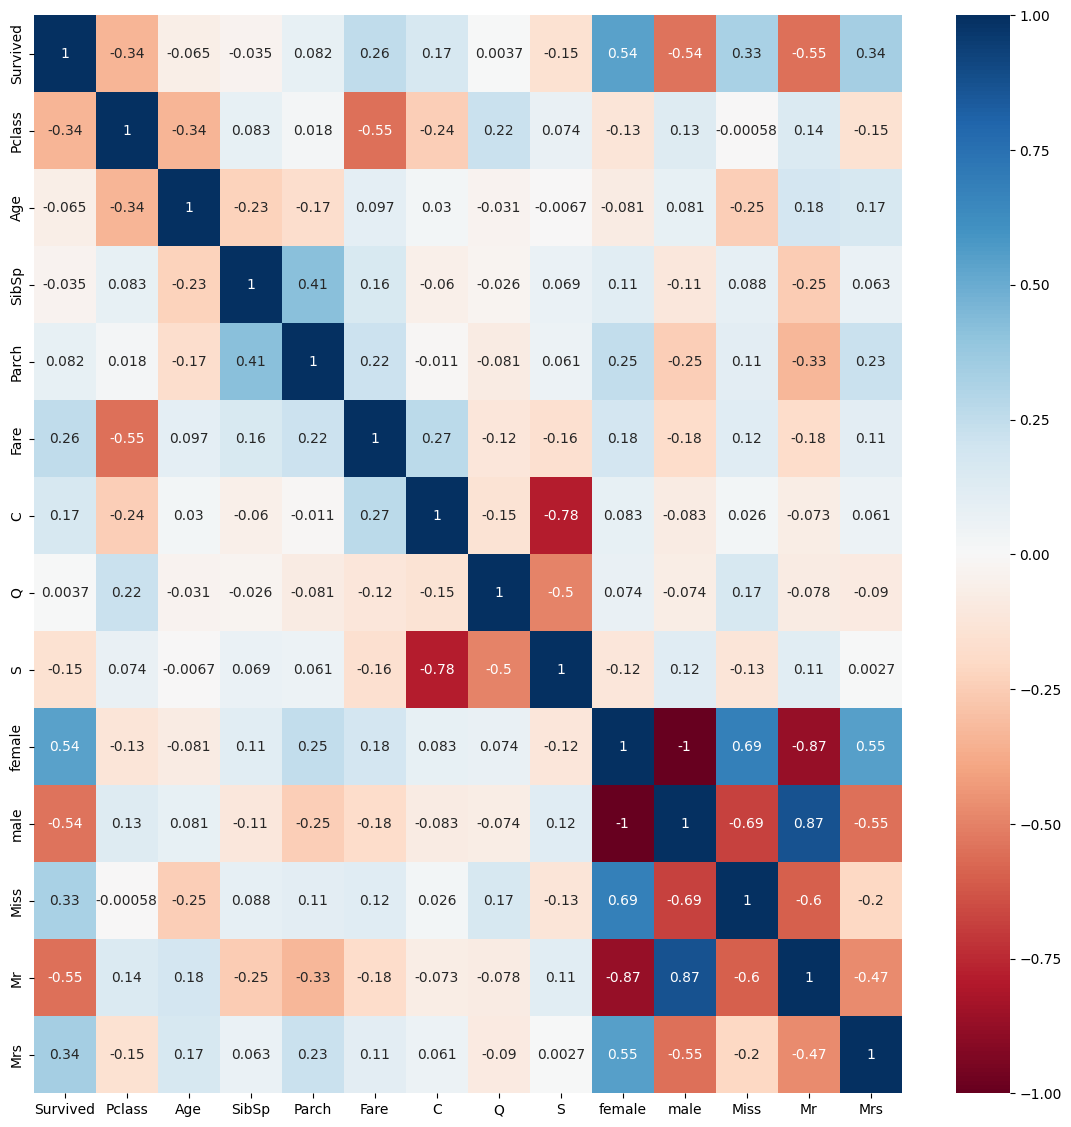

In [13]:
# 找出相關係數 (heatmap)
import matplotlib.pyplot as plt
import seaborn as sns


traindf.corr()
# 找出相關係數，但不方便看

plt.figure(figsize=(14,14))
sns.heatmap(traindf.corr(), cmap="RdBu", annot=True)

In [14]:
# Ensemble 兩種組合方式
# 1. 平行組合
#   1.1. 多組模型同時測試 (每組模型需略有不同) 然後投票
# 2. 連續組合
#   2.1. 一組模型連續測試，每次都將前次的錯誤修正，逐次調整

In [15]:
# 平行組合方法一 - 隨機森林 (cross_val_score)
# 決策樹 train_test_split 每次取樣都不太一樣，多棵決策樹同時進行

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


clf = RandomForestClassifier(max_depth=6, n_estimators=20)
# max_depth 先假設5 / n_estimators 想要幾棵決策樹(通常20起手)

x = traindf.drop(["Survived"], axis=1)
# 資料 df

y = traindf["Survived"]
# 答案 df

xarray = np.array(x)
yarray = np.array(y)
# 轉array

cross_val_score(clf, xarray, yarray, cv=10)
# cv 將資料切割成10
# 這邊與之前切割方式不同
# 之前切割成兩份 90% 10%
# 此處切成10份  1 test 其餘9train / 2 test 其餘9train ....

np.average(cross_val_score(clf, xarray, yarray, cv=10))
# 10 個分數取平均
# 取完平均後，可以再手動調整一下 max_depth & n_estimators 看看效果有沒有差異

0.8305617977528088

In [16]:
# 平行組合方法二 - 貪婪搜索 (GridSearchCV)
from sklearn.model_selection import GridSearchCV

p = {
    "max_depth":range(5,11),
    "n_estimators":range(20,100,10)
}

clf = RandomForestClassifier()
s = GridSearchCV(clf, p, cv=10)
# 將所有想要自動調整的參數，都放到前面的dict中

s.fit(xarray, yarray)
# 將資料帶入

print("最佳參數:", s.best_params_)
print("最佳成績:", s.best_score_)
# 文件(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

最佳參數: {'max_depth': 7, 'n_estimators': 20}
最佳成績: 0.8373283395755307


In [17]:
# 丟入測試資料

testx = testdf.drop(["PassengerId"], axis=1)
# 將答案中的ID 丟掉
testid = testdf["PassengerId"]
# ID


clf = RandomForestClassifier(max_depth=7, n_estimators=50)
# 直接參考 GridSearchCV 結果

clf.fit(xarray, yarray)
# 將資料帶入
pre = clf.predict(testx)
pre
# predict

c:\Users\李重誼\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
# 整理出答案
Titanic_result = pd.DataFrame()

Titanic_result["PassengerId"] = testid
Titanic_result["Survived"] = pre

Titanic_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [19]:
# 儲存成csv
# Titanic_result.to_csv("Titanic_result.csv", encoding="utf-8", index=False)

In [20]:
# 總檢視
print(x.columns)
print(clf.feature_importances_)
# 重要程度

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female',
       'male', 'Miss', 'Mr', 'Mrs'],
      dtype='object')
[0.12180828 0.11410624 0.04898289 0.03131333 0.15443503 0.01301613
 0.00836693 0.01506987 0.13114353 0.11988474 0.02164084 0.19233049
 0.02790171]
